One last assignment! This week you have only one homework question to turn in, but you are encouraged to work on a project and apply what you've learned to it.

Create a new Jupyter Notebook (or the one provided) and use it to answer the following assignments.


Load the MovieData.csv file (one last time...) and:

a) Create a scatter-plot with Movie Budgets as the X axis, and Profit Margin (Total Revenue / Budget) as the Y axis. Resize the Y axis as needed to convey the most information. (5 points)

b) Create two time series: one a count of movies released by month-year (Jan-1990, Feb-1990, etc.), the other those movies' average profitability. Plot both series either in two aligned subplots or in a single subplot with a secondary axis. (10 points)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [3]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values=["Unknown", "Unkno"], 
                         parse_dates=[0], date_parser=make_date)

In [4]:
# Replace missing values with zeros
movies.fillna(0, inplace=True)

In [5]:
movies.head()

Release_Date                                     Movie  Distributor  \
0   2012-03-09                               John Carter            0   
1   2007-05-25  Pirates of the Caribbean: At World's End  Buena Vista   
2   2013-12-13          The Hobbit: There and Back Again     New Line   
3   2012-12-14         The Hobbit: An Unexpected Journey     New Line   
4   2010-11-24                                   Tangled  Buena Vista   

      Budget     US Gross  Worldwide Gross  
0  300000000   66439100.0      254439100.0  
1  300000000  309420425.0      960996492.0  
2  270000000          0.0              0.0  
3  270000000          0.0              0.0  
4  260000000  200821936.0      586581936.0

In [6]:
# Fill in Worldwide Gross when it's missing
#movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"]
#movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["Worldwide Gross"].mean()


In [7]:
movies["Profit Margin"] = movies["Worldwide Gross"] / movies["Budget"]
movies["Average_Profitability"] = (movies["Worldwide Gross"] - movies["Budget"]) / len(movies["Budget"])
movies.head()

Release_Date                                     Movie  Distributor  \
0   2012-03-09                               John Carter            0   
1   2007-05-25  Pirates of the Caribbean: At World's End  Buena Vista   
2   2013-12-13          The Hobbit: There and Back Again     New Line   
3   2012-12-14         The Hobbit: An Unexpected Journey     New Line   
4   2010-11-24                                   Tangled  Buena Vista   

      Budget     US Gross  Worldwide Gross  Profit Margin  \
0  300000000   66439100.0      254439100.0       0.848130   
1  300000000  309420425.0      960996492.0       3.203322   
2  270000000          0.0              0.0       0.000000   
3  270000000          0.0              0.0       0.000000   
4  260000000  200821936.0      586581936.0       2.256084   

   Average_Profitability  
0          -12561.593604  
1          182243.311828  
2          -74441.687345  
3          -74441.687345  
4           90041.890267

In [8]:
movies["Budget"].max()

300000000

In [9]:
movies["Budget"].min()

1100

In [10]:
movies["Profit Margin"].max()

13112.1104

In [11]:
movies["Profit Margin"].min()

0.0

### a) Create a scatter-plot with Movie Budgets as the X axis, and Profit Margin (Total Revenue / Budget) as the Y axis. Resize the Y axis as needed to convey the most information. (5 points)

(-3, 235)

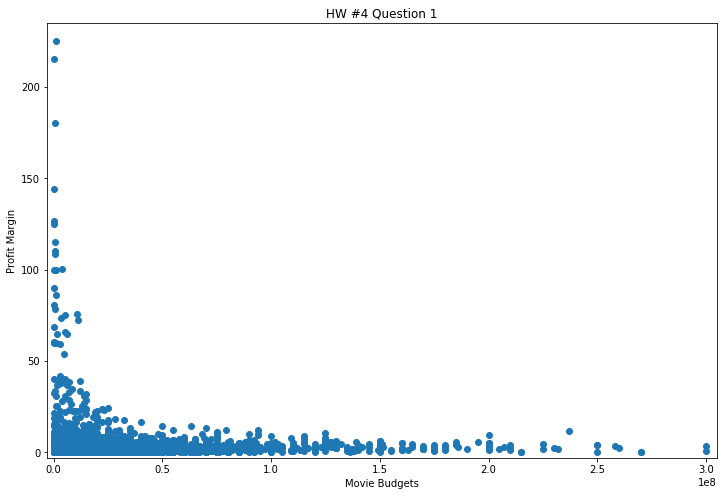

In [12]:
#Create a scatter-plot with Movie Budgets as the X axis, 
#and Profit Margin (Total Revenue / Budget) as the Y axis. 
#Resize the Y axis as needed to convey the most information.
x_axis = movies["Budget"]
y_axis = movies["Profit Margin"]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title("HW #4 Question 1")
ax.set_xlabel("Movie Budgets")
ax.set_ylabel("Profit Margin")
ax.scatter(x_axis, y_axis)

ax.set_xlim(-3000000, 305000000)
ax.set_ylim(-3, 235)


In [13]:
movies.dtypes

Release_Date             datetime64[ns]
Movie                            object
Distributor                      object
Budget                            int64
US Gross                        float64
Worldwide Gross                 float64
Profit Margin                   float64
Average_Profitability           float64
dtype: object

In [14]:
min(movies["Release_Date"])

Timestamp('1915-02-08 00:00:00')

In [15]:
max(movies["Release_Date"])

Timestamp('2013-12-13 00:00:00')

In [16]:
movies.head()

Release_Date                                     Movie  Distributor  \
0   2012-03-09                               John Carter            0   
1   2007-05-25  Pirates of the Caribbean: At World's End  Buena Vista   
2   2013-12-13          The Hobbit: There and Back Again     New Line   
3   2012-12-14         The Hobbit: An Unexpected Journey     New Line   
4   2010-11-24                                   Tangled  Buena Vista   

      Budget     US Gross  Worldwide Gross  Profit Margin  \
0  300000000   66439100.0      254439100.0       0.848130   
1  300000000  309420425.0      960996492.0       3.203322   
2  270000000          0.0              0.0       0.000000   
3  270000000          0.0              0.0       0.000000   
4  260000000  200821936.0      586581936.0       2.256084   

   Average_Profitability  
0          -12561.593604  
1          182243.311828  
2          -74441.687345  
3          -74441.687345  
4           90041.890267

In [17]:
movies["Month"] = movies.Release_Date.apply(lambda x: x.month)

In [18]:
movies.head()

Release_Date                                     Movie  Distributor  \
0   2012-03-09                               John Carter            0   
1   2007-05-25  Pirates of the Caribbean: At World's End  Buena Vista   
2   2013-12-13          The Hobbit: There and Back Again     New Line   
3   2012-12-14         The Hobbit: An Unexpected Journey     New Line   
4   2010-11-24                                   Tangled  Buena Vista   

      Budget     US Gross  Worldwide Gross  Profit Margin  \
0  300000000   66439100.0      254439100.0       0.848130   
1  300000000  309420425.0      960996492.0       3.203322   
2  270000000          0.0              0.0       0.000000   
3  270000000          0.0              0.0       0.000000   
4  260000000  200821936.0      586581936.0       2.256084   

   Average_Profitability  Month  
0          -12561.593604      3  
1          182243.311828      5  
2          -74441.687345     12  
3          -74441.687345     12  
4           90041.890267     11

In [19]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [20]:
movies.columns

Index(['Release_Date', 'Movie', 'Distributor', 'Budget', 'US Gross',
       'Worldwide Gross', 'Profit Margin', 'Average_Profitability', 'Month',
       'Year'],
      dtype='object')

In [21]:
movies.head()

Release_Date                                     Movie  Distributor  \
0   2012-03-09                               John Carter            0   
1   2007-05-25  Pirates of the Caribbean: At World's End  Buena Vista   
2   2013-12-13          The Hobbit: There and Back Again     New Line   
3   2012-12-14         The Hobbit: An Unexpected Journey     New Line   
4   2010-11-24                                   Tangled  Buena Vista   

      Budget     US Gross  Worldwide Gross  Profit Margin  \
0  300000000   66439100.0      254439100.0       0.848130   
1  300000000  309420425.0      960996492.0       3.203322   
2  270000000          0.0              0.0       0.000000   
3  270000000          0.0              0.0       0.000000   
4  260000000  200821936.0      586581936.0       2.256084   

   Average_Profitability  Month  Year  
0          -12561.593604      3  2012  
1          182243.311828      5  2007  
2          -74441.687345     12  2013  
3          -74441.687345     12  2012  
4           90041.890267     11  2010

In [22]:
by_year = movies.groupby("Year")

In [23]:
#by_monthyear = movies.groupby([(movies.Year), (movies.Month)]).count()
by_monthyear = movies.groupby([(movies.Month), (movies.Year)]).count()
by_monthyear1 = by_monthyear[["Movie"]]
by_monthyear1.head()

Movie
Month Year       
1     1925      1
      1930      1
      1934      1
      1938      2
      1939      2

In [24]:
by_monthyear1.tail()

Movie
Month Year       
12    2009     25
      2010     25
      2011      9
      2012      1
      2013      1

In [25]:
by_AvgProfitability = movies.groupby([(movies.Month), (movies.Year), (movies.Average_Profitability)]).mean()
by_AvgProfitability.columns

Index(['Budget', 'US Gross', 'Worldwide Gross', 'Profit Margin'], dtype='object')

In [26]:
movies.set_index("Month", "Year")

Release_Date                                        Movie  \
Month                                                             
3       2012-03-09                                  John Carter   
5       2007-05-25     Pirates of the Caribbean: At World's End   
12      2013-12-13             The Hobbit: There and Back Again   
12      2012-12-14            The Hobbit: An Unexpected Journey   
11      2010-11-24                                      Tangled   
5       2007-05-04                                 Spider-Man 3   
7       2009-07-15       Harry Potter and the Half-Blood Prince   
5       2011-05-20  Pirates of the Caribbean: On Stranger Tides   
7       2012-07-20                        The Dark Knight Rises   
12      2009-12-18                                       Avatar   
6       2006-06-28                             Superman Returns   
11      2008-11-14                            Quantum of Solace   
5       2008-05-16     The Chronicles of Narnia: Prince Caspian   
7       2006-07-07   Pirates of the Caribbean: Dead Man's Chest   
12      2010-12-31                              The Lone Ranger   
5       2012-05-25                               Men in Black 3   
6       2009-06-24          Transformers: Revenge of the Fallen   
5       2006-05-26                        X-Men: The Last Stand   
5       2010-05-14                                   Robin Hood   
12      2005-12-14                                    King Kong   
12      2007-12-07       His Dark Materials: The Golden Compass   
6       2011-06-24                                       Cars 2   
6       2010-06-18                                  Toy Story 3   
12      1997-12-19                                      Titanic   
12      2010-12-17                                 Tron: Legacy   
11      2009-11-13                                         2012   
5       2009-05-21      Terminator Salvation: The Future Begins   
3       2010-03-05                          Alice in Wonderland   
6       2004-06-30                                 Spider-Man 2   
5       2010-05-28              Prince of Persia: Sands of Time   
...            ...                                          ...   
4       2005-04-29                                  Funny Ha Ha   
10      2010-10-15                                 Down Terrace   
9       2006-09-01                          Mutual Appreciation   
12      1999-12-24                               Pink Narcissus   
10      1994-10-19                                       Clerks   
1       2000-01-14                                The Terrorist   
6       2003-06-13                                       Manito   
6       1972-06-30                                  Deep Throat   
8       1997-08-01                        In the Company of Men   
8       1991-08-01                                      Slacker   
11      2011-11-25                                   The Ridges   
9       2009-09-25                          Paranormal Activity   
4       2010-04-02                             Breaking Upwards   
6       2006-06-02                              The Puffy Chair   
4       1997-04-11                               Pink Flamingos   
4       2006-04-28                     Grip: A Criminal's Story   
4       1996-04-01                                         Bang   
8       2008-08-14              The Rise and Fall of Miss Thang   
4       2006-04-28                                        Clean   
5       2004-05-28                              On the Down Low   
7       2001-07-06                                         Cure   
3       2001-03-09                                      Dayereh   
1       2012-01-13                                    Newlyweds   
10      2004-10-08                                       Primer   
2       1993-02-26                                  El Mariachi   
5       2006-05-26                                       Cavite   
1       2004-01-01                              The M

In [27]:
by_monthyear1.columns

Index(['Movie'], dtype='object')

In [28]:
by_AvgProfitability = movies.groupby([(movies.Month), (movies.Year), (movies.Average_Profitability)]).mean()

In [29]:
by_AvgProfitability.head()

Budget    US Gross  Worldwide Gross  \
Month Year Average_Profitability                                         
1     1925  5998.070030            245000  11000000.0       22000000.0   
      1930 -1102.839813           4000000         0.0              0.0   
      1934 -89.605735              325000   2500000.0              0.0   
      1938 -551.419906            2000000   4000000.0              0.0   
           -453.267163            1644000   4000000.0              0.0   

                                  Profit Margin  
Month Year Average_Profitability                 
1     1925  5998.070030               89.795918  
      1930 -1102.839813                0.000000  
      1934 -89.605735                  0.000000  
      1938 -551.419906                 0.000000  
           -453.267163                 0.000000

In [30]:
by_AvgProfitability.keys

<bound method NDFrame.keys of                                      Budget     US Gross  Worldwide Gross  \
Month Year Average_Profitability                                            
1     1925  5998.070030              245000   11000000.0       22000000.0   
      1930 -1102.839813             4000000          0.0              0.0   
      1934 -89.605735                325000    2500000.0              0.0   
      1938 -551.419906              2000000    4000000.0              0.0   
           -453.267163              1644000    4000000.0              0.0   
      1939 -765.646540              2777000   28202232.0              0.0   
           -413.564930              1500000    9000000.0              0.0   
      1940 -551.419906              2000000    9172000.0              0.0   
           -355.114420              1288000    6000000.0              0.0   
      1943 -286.462641              1039000   10462500.0              0.0   
      1944 -650.951199              2361000   

In [31]:
#by_AvgProfitability.set_index("Month", "Year", inplace=True)

In [32]:
#by_monthyear = movies.groupby([(movies.Year), (movies.Month)]).count()
by_monthyear2 = movies.groupby([(movies.Month), (movies.Year)]).mean()
by_monthyear3 = by_monthyear2[["Average_Profitability"]]
by_monthyear3.head()

Average_Profitability
Month Year                       
1     1925            5998.070030
      1930           -1102.839813
      1934             -89.605735
      1938            -502.343535
      1939            -589.605735

### b) Create two time series: one a count of movies released by month-year (Jan-1990, Feb-1990, etc.), the other those movies' average profitability. Plot both series either in two aligned subplots or in a single subplot with a secondary axis. (10 points)

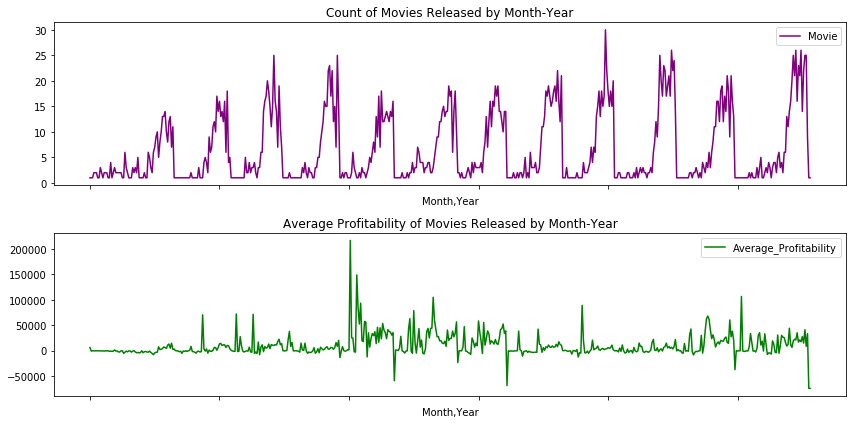

In [33]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(211)
ax1.set_title("Count of Movies Released by Month-Year")
by_monthyear1.plot(ax=ax1, c="purple")

ax2 = fig.add_subplot(212)
ax2.set_title("Average Profitability of Movies Released by Month-Year")
by_monthyear3.plot(ax=ax2, c="green")

fig.tight_layout()